# Hair Color Recognition
*Author: Mahmud Huseynov*

## Introduction

This notebook demonstrates the first iteration of a hair color recognition algorithm using a dataset of cattle images. The goal is to predict a cattle’s hair color based on the provided image. Hair color prediction can be useful in livestock tracking and identification. This is a classification task where each possible hair color represents a class, and the provided image of the cow should be classified into one of the hair color categories with as much certainty as possible.

First, we’ll display the versions of the required libraries. This helps ensure reproducibility and enables easy debugging in case problems arise in the future.

In [3]:
# Import libraries
import copy, pathlib, math
import PIL.Image as Image
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Print library versions
print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", np.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.4.2
numpy version: 1.26.4
matplotlib version: 3.8.4


## Data Provisioning

### Data Requirements

To predict hair color, the target variable is the hair color label assigned to each cattle image. Each image is labeled as belonging to one of two hair color classes: “Roodbont” (Red/White) or “Zwartbont” (Black/White). The dataset consists of the following key requirements:

- Target Variable: Hair color (categorical).
- Predictors: Cattle images in RGB format resized to a uniform size of 256x256 pixels.
- Data Quality: All images must be resized to a consistent dimension, and labels should be accurate. Any noisy or irrelevant images should be removed from the dataset.
In further iterations, the data provisioning phase will involve additional steps such as sourcing images and ensuring data quality. For this notebook, we’ll just focus on loading the data and preparing it for model training.n

### Data Collection

The dataset consists of labeled cattle images stored in the directory structure where the folder names correspond to the hair color labels. The image files are in .jpg format and are collected from a local dataset of cattle images. Future iterations might include sourcing data from external sources or creating a larger dataset with more diverse images.

### Data Understanding

In this section, we load and explore the dataset to gain insights into the data:
	
 - Number of images: There are currently 53 images in total.
 - Classes: The images are labeled into two hair color categories:
 - “Roodbont” (Red/White)
 - “Zwartbont” (Black/White)

This dataset consists of image data where we’ll be using the pixel values (RGB channels) as the primary input for our classification model.

#### Loading the images:
We load the images and resize them to a uniform dimension (256x256) to ensure consistency for model training. Each image is represented as a flattened array of pixel values (RGB) and is associated with its corresponding hair color label.

In [8]:
size = 256  # Image size

# Function to load and resize image
def load_image(file, size):
    img = Image.open(file).convert('RGB')  # Ensure all images are in RGB mode
    img = img.resize((size, size))
    return np.array(img).flatten()

# Function to load images and their labels
def load_labelled_images(path, size):
    labels = []
    files = []
    for file_info in pathlib.Path(path).glob("**/*.jpg"):
        labels.append(file_info.parts[1])  # Assuming folder names are hair color labels
        files.append(str(file_info))
    imgs = np.array([load_image(f, size) for f in files])
    return imgs, np.array(labels)

# Load images and labels
images, labels = load_labelled_images("./Data", size)

# Check the number of loaded images and classes
print(f"Loaded {len(images)} images in {len(np.unique(labels))} hair color classes:")
for label in np.unique(labels):
    print(label)

Loaded 53 images in 2 hair color classes:
Roodbont
Zwartbont


## Data Sampling

We will display a sample of the images to visually inspect the data. This will help us confirm that the images have been loaded and resized correctly.

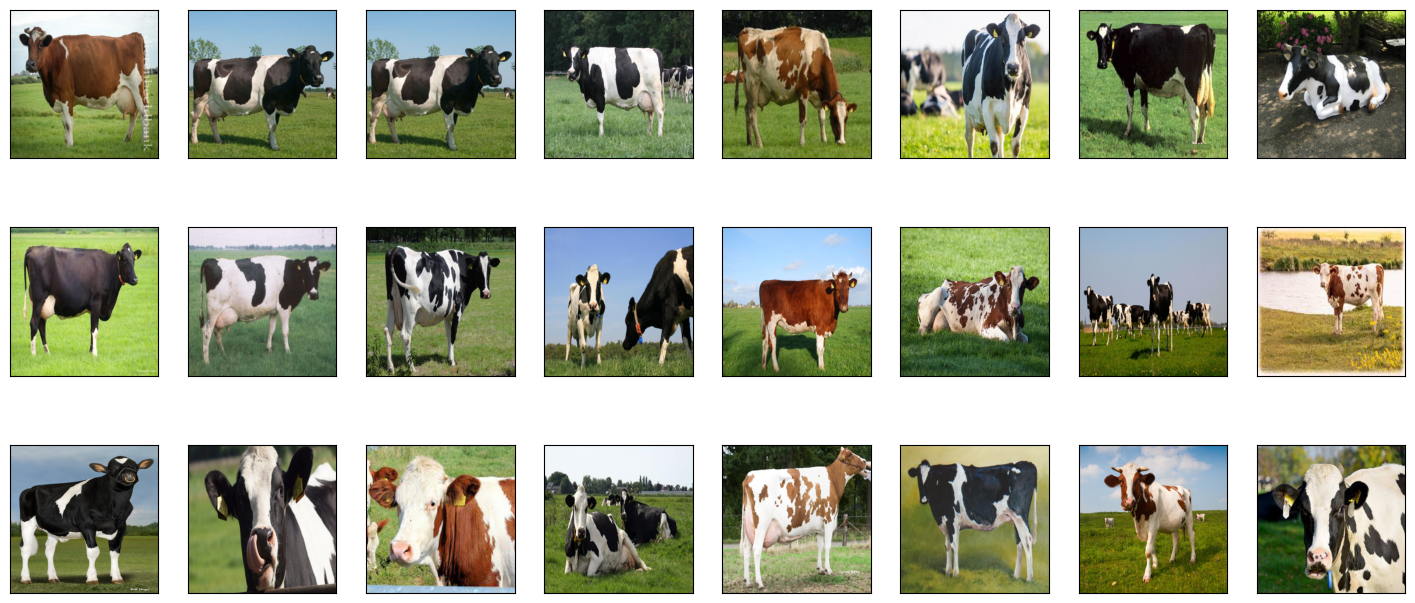

In [10]:
import copy
import math

sample_size = 24
plotimgs = copy.deepcopy(images)
np.random.shuffle(plotimgs)  # Shuffle the images
rows = plotimgs[:sample_size]  # Select a sample

# Plotting the images
_, subplots = plt.subplots(nrows=math.ceil(sample_size / 8), ncols=8, figsize=(18, int(sample_size / 3)))
subplots = subplots.flatten()

for i, img in enumerate(rows):
    subplots[i].imshow(np.reshape(img, (size, size, 3)))
    subplots[i].set_xticks([])  # Remove axis ticks
    subplots[i].set_yticks([])
plt.show()

## Preprocessing

Since the dataset consists of images, there isn’t much feature selection to perform. The only preprocessing step involves splitting the dataset into training and testing sets.

## Splitting into Train/Test

We’ll split the dataset into a training set and a testing set using a 70%/30% ratio. This is a common practice to ensure that the model has sufficient training data while also leaving enough unseen data for evaluation.

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

## Modeling

We will now train a classification model using a Support Vector Machine (SVM). SVMs are a popular choice for image classification tasks due to their ability to handle complex decision boundaries.

In [14]:
from sklearn.svm import SVC

# Initialize and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5625


## Evaluation

We’ll now evaluate the model’s performance by generating a classification report. This report provides precision, recall, and F1-score for each class.

In [16]:
from sklearn.metrics import classification_report

# Predict on the test set
predictions = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions, zero_division=0)
print(report)

              precision    recall  f1-score   support

    Roodbont       1.00      0.30      0.46        10
   Zwartbont       0.46      1.00      0.63         6

    accuracy                           0.56        16
   macro avg       0.73      0.65      0.55        16
weighted avg       0.80      0.56      0.53        16



## Visualizing Predictions

To further assess the model’s performance, we’ll plot the test set images along with the predicted hair color labels. Correct predictions will be marked as such, while incorrect ones will be labeled as “wrong.”

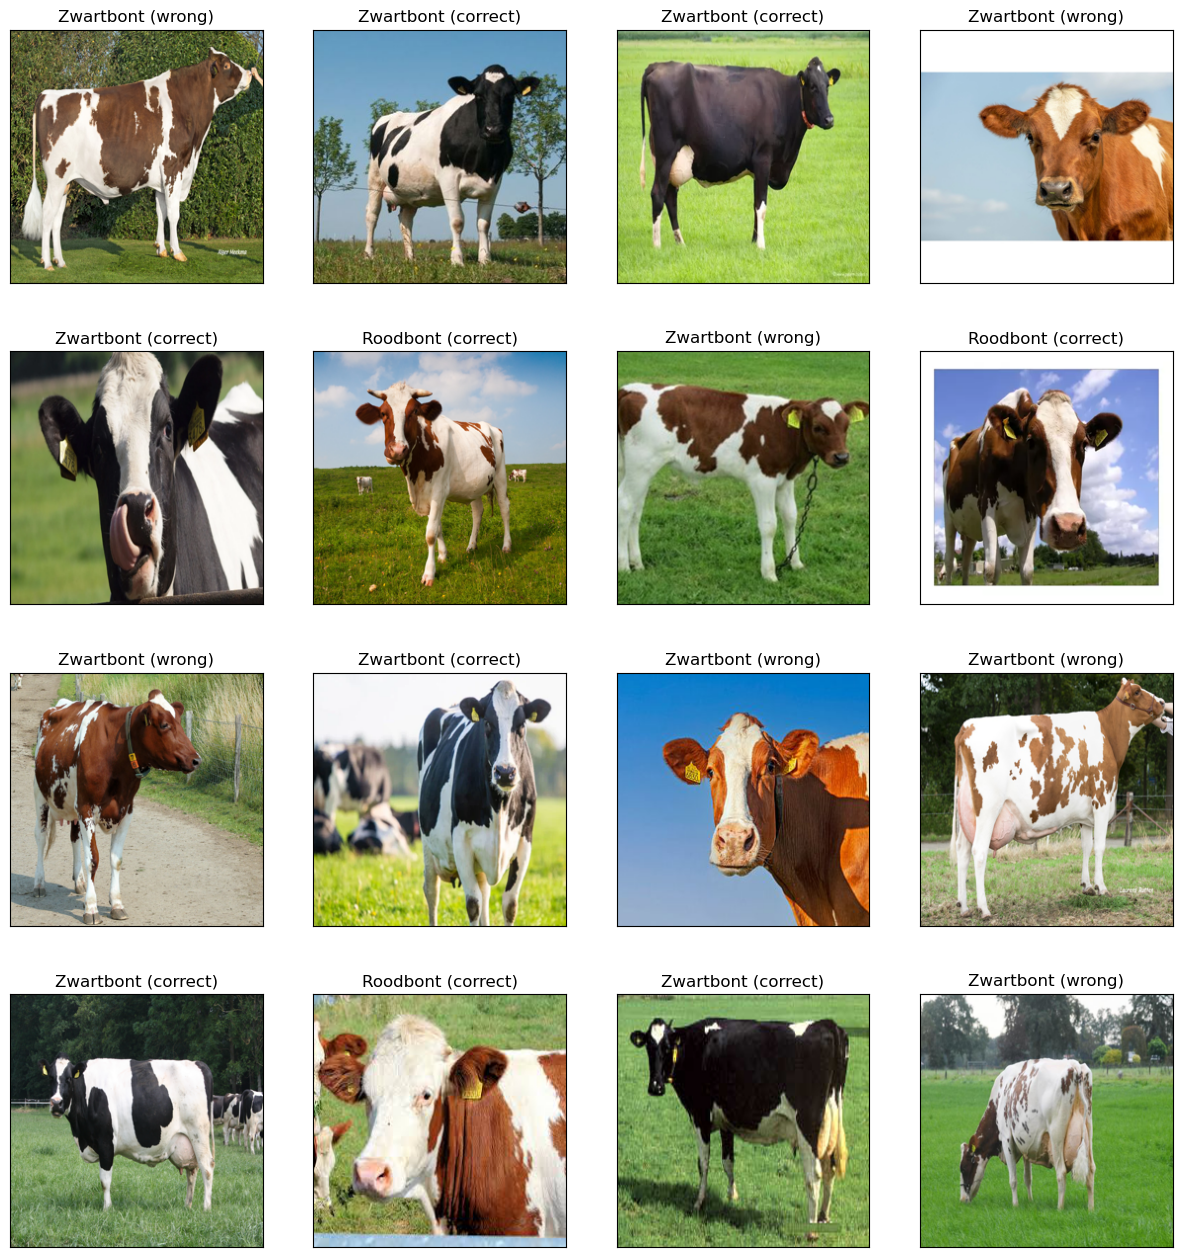

In [18]:
# Plot test set predictions
_, subplots = plt.subplots(nrows=math.ceil(len(X_test) / 4), ncols=4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, img in enumerate(X_test):
    subplots[i].imshow(np.reshape(img, (size, size, 3)))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    title = f"{predictions[i]} (correct)" if predictions[i] == y_test[i] else f"{predictions[i]} (wrong)"
    subplots[i].set_title(title)

plt.show()